In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
traindata = pd.read_csv('kdd_train.csv')
testdata = pd.read_csv('kdd_test.csv')

In [3]:
data = pd.concat([traindata,testdata])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
categ = ['protocol_type','service','flag','labels']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [5]:
X = data.iloc[:,1:41]
Y = data['labels']

In [6]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)

In [7]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [8]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [9]:
X_train.shape

(118813, 40, 1)

In [10]:
Y_train.shape

(118813,)

In [11]:
X_test.shape

(29704, 40, 1)

In [12]:
Y_test.shape

(29704,)

In [20]:
model = Sequential()
model.add(LSTM(128,input_shape=(40, 1)))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(40))
model.add(Activation('softmax'))


In [21]:
# define optimizer and objective, compile cnn
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [22]:
# train
checkpointer = callbacks.ModelCheckpoint(filepath="results/cnn1results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')


In [23]:
history=model.fit(X_train, Y_train, epochs=100,verbose=1,batch_size=500,validation_data=(X_test, Y_test),callbacks=[checkpointer])

Epoch 1/100
238/238 [==============================] - 30s 119ms/step - loss: 1.4599 - accuracy: 0.5141 - val_loss: 1.3252 - val_accuracy: 0.5315
Epoch 2/100
238/238 [==============================] - 28s 117ms/step - loss: 1.3415 - accuracy: 0.5262 - val_loss: 1.3261 - val_accuracy: 0.5315
Epoch 3/100
238/238 [==============================] - 29s 120ms/step - loss: 1.3386 - accuracy: 0.5267 - val_loss: 1.3305 - val_accuracy: 0.5315
Epoch 4/100
238/238 [==============================] - 30s 125ms/step - loss: 1.3361 - accuracy: 0.5284 - val_loss: 1.3251 - val_accuracy: 0.5315
Epoch 5/100
238/238 [==============================] - 28s 119ms/step - loss: 1.1678 - accuracy: 0.6293 - val_loss: 0.7883 - val_accuracy: 0.8099
Epoch 6/100
238/238 [==============================] - 28s 116ms/step - loss: 0.7296 - accuracy: 0.8183 - val_loss: 0.6462 - val_accuracy: 0.8266
Epoch 7/100
238/238 [==============================] - 28s 116ms/step - loss: 0.6278 - accuracy: 0.8288 - val_loss: 0.5537 -

Epoch 38/100
238/238 [==============================] - 28s 117ms/step - loss: 0.1647 - accuracy: 0.9515 - val_loss: 0.1647 - val_accuracy: 0.9529
Epoch 39/100
238/238 [==============================] - 28s 117ms/step - loss: 0.1962 - accuracy: 0.9437 - val_loss: 0.2294 - val_accuracy: 0.9316
Epoch 40/100
238/238 [==============================] - 28s 117ms/step - loss: 0.1721 - accuracy: 0.9497 - val_loss: 0.1448 - val_accuracy: 0.9573
Epoch 41/100
238/238 [==============================] - 28s 118ms/step - loss: 0.1590 - accuracy: 0.9526 - val_loss: 0.1476 - val_accuracy: 0.9552
Epoch 42/100
238/238 [==============================] - 28s 117ms/step - loss: 0.1544 - accuracy: 0.9534 - val_loss: 0.1639 - val_accuracy: 0.9516
Epoch 43/100
238/238 [==============================] - 28s 117ms/step - loss: 0.1587 - accuracy: 0.9522 - val_loss: 0.2279 - val_accuracy: 0.9288
Epoch 44/100
238/238 [==============================] - 28s 118ms/step - loss: 0.1510 - accuracy: 0.9546 - val_loss: 0

238/238 [==============================] - 29s 120ms/step - loss: 0.1134 - accuracy: 0.9641 - val_loss: 0.1083 - val_accuracy: 0.9664
Epoch 75/100
238/238 [==============================] - 29s 120ms/step - loss: 0.1069 - accuracy: 0.9660 - val_loss: 0.0973 - val_accuracy: 0.9696
Epoch 76/100
238/238 [==============================] - 29s 120ms/step - loss: 0.1050 - accuracy: 0.9660 - val_loss: 0.1019 - val_accuracy: 0.9670
Epoch 77/100
238/238 [==============================] - 30s 124ms/step - loss: 0.1432 - accuracy: 0.9570 - val_loss: 0.1748 - val_accuracy: 0.9435
Epoch 78/100
238/238 [==============================] - 29s 120ms/step - loss: 0.1387 - accuracy: 0.9575 - val_loss: 0.1712 - val_accuracy: 0.9420
Epoch 79/100
238/238 [==============================] - 28s 119ms/step - loss: 0.1163 - accuracy: 0.9636 - val_loss: 0.0998 - val_accuracy: 0.9677
Epoch 80/100
238/238 [==============================] - 29s 122ms/step - loss: 0.1188 - accuracy: 0.9630 - val_loss: 0.1114 - val_a

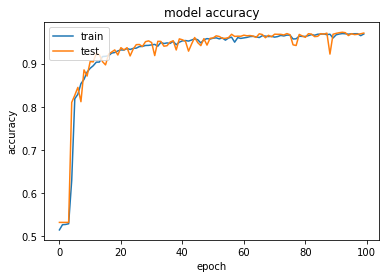

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

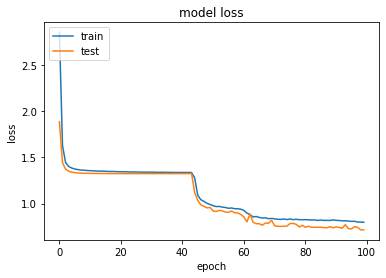

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.save("results/cnn1results/cnn_model.hdf5")